In [ ]:
Zfrom google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# !pip install umap

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# import umap
# import umap.plot

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# !pip install ploty

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv')

In [ ]:
df

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecg.csv', header=None)

In [ ]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  roc_auc = roc_auc_score(y_test, pred_proba)
  print('confusion matrix')
  print(confusion)

  print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, \ F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  return confusion

In [ ]:
colors = ['green', 'red']
labels = ['Normal', 'abnormal']
values = dataframe[140].value_counts()/dataframe[140].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values = values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo = 'percent', textfont_size = 20,
                  marker = dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text = 'ECG',
    title_font_color=' white',
    legend_title_font_color = 'yellow',
    paper_bgcolor = 'black',
    plot_bgcolor = 'black',
    font_color = 'white'
)

fig.show()

In [ ]:
raw_data = dataframe.values

In [ ]:
labels=raw_data[:,-1]
data = raw_data[:,0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=101)

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)


train_data = (train_data - min_val)/(max_val - min_val)
test_data = (test_data - min_val)/(max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data,tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

print("len(train): ", len(train_labels))
print("len(test): ", len(test_labels))

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

len(train):  3998
len(test):  1000


Text(0.5, 1.0, 'normal ecg')

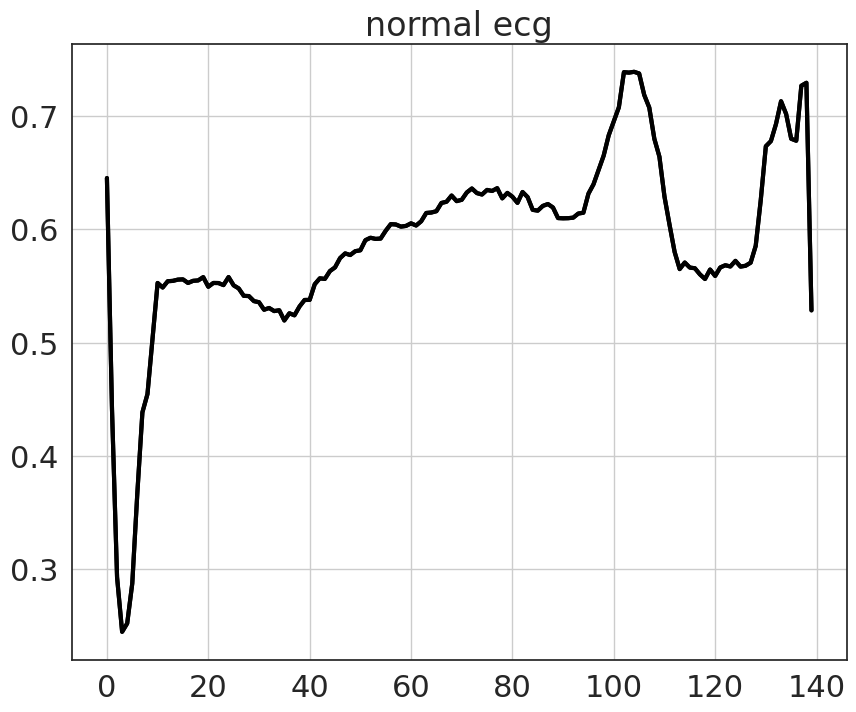

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.set_style('white')
plt.grid()
plt.plot(np.arange(140), normal_train_data[60],color='black', linewidth=3.0)
plt.plot(normal_train_data[60],color='black', linewidth=3.0)
plt.title('normal ecg')

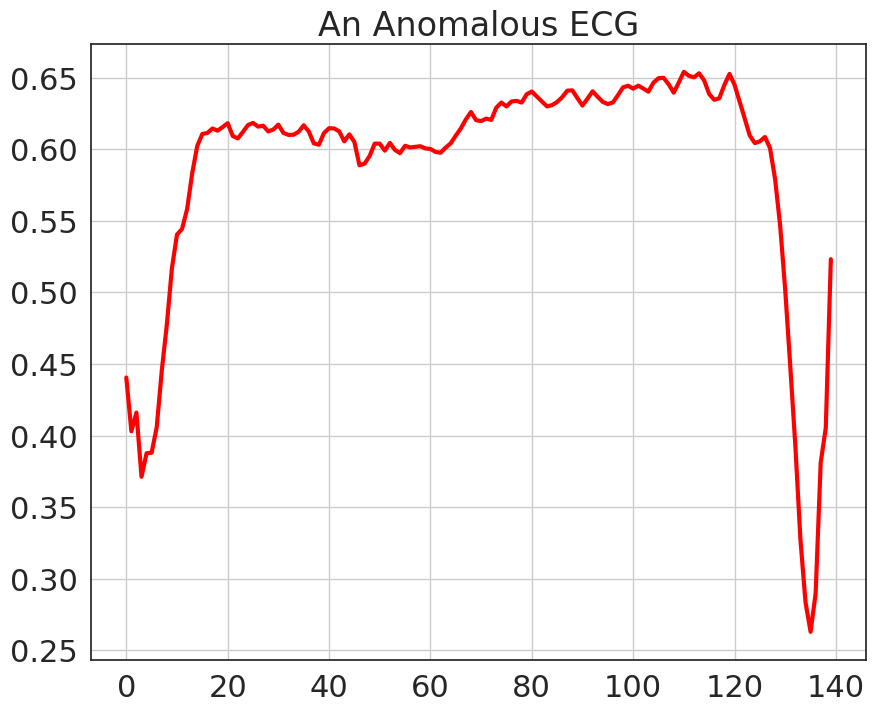

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0],color='red',linewidth=3.0)
plt.title("An Anomalous ECG")
plt.show()

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [ ]:
autoencoder.compile(optimizer = 'adam', loss='mae', metrics=['accuracy'])

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=500,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/500
5/5 [==============================] - 3s 166ms/step - loss: 0.0171 - accuracy: 0.2023 - val_loss: 0.0261 - val_accuracy: 0.1170
Epoch 2/500
5/5 [==============================] - 0s 22ms/step - loss: 0.0151 - accuracy: 0.1967 - val_loss: 0.0252 - val_accuracy: 0.1270
Epoch 3/500
5/5 [==============================] - 0s 21ms/step - loss: 0.0143 - accuracy: 0.2162 - val_loss: 0.0244 - val_accuracy: 0.1270
Epoch 4/500
5/5 [==============================] - 0s 19ms/step - loss: 0.0136 - accuracy: 0.1945 - val_loss: 0.0241 - val_accuracy: 0.1300
Epoch 5/500
5/5 [==============================] - 0s 21ms/step - loss: 0.0132 - accuracy: 0.2088 - val_loss: 0.0242 - val_accuracy: 0.1260
Epoch 6/500
5/5 [==============================] - 0s 21ms/step - loss: 0.0130 - accuracy: 0.2075 - val_loss: 0.0242 - val_accuracy: 0.1300
Epoch 7/500
5/5 [==============================] - 0s 20ms/step - loss: 0.0129 - accuracy: 0.2123 - val_loss: 0.0241 - val_accuracy: 0.1260
Epoch 8/500
5/5 [==

In [ ]:
autoencoder.summary()

Model: "anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 8)                 5176      
                                                                 
 sequential_1 (Sequential)   (None, 140)               5308      
                                                                 
Total params: 10484 (40.95 KB)
Trainable params: 10484 (40.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.keras.models.save_model(autoencoder, '/content/drive/MyDrive/Colab Notebooks/')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/')

In [ ]:
loaded_model.summary()

Model: "anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 8)                 5176      
                                                                 
 sequential_1 (Sequential)   (None, 140)               5308      
                                                                 
Total params: 10484 (40.95 KB)
Trainable params: 10484 (40.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
training_acc = autoencoder.history.history['accuracy']
validation_acc = autoencoder.history.history['val_accuracy']

KeyError: 'accuracy'

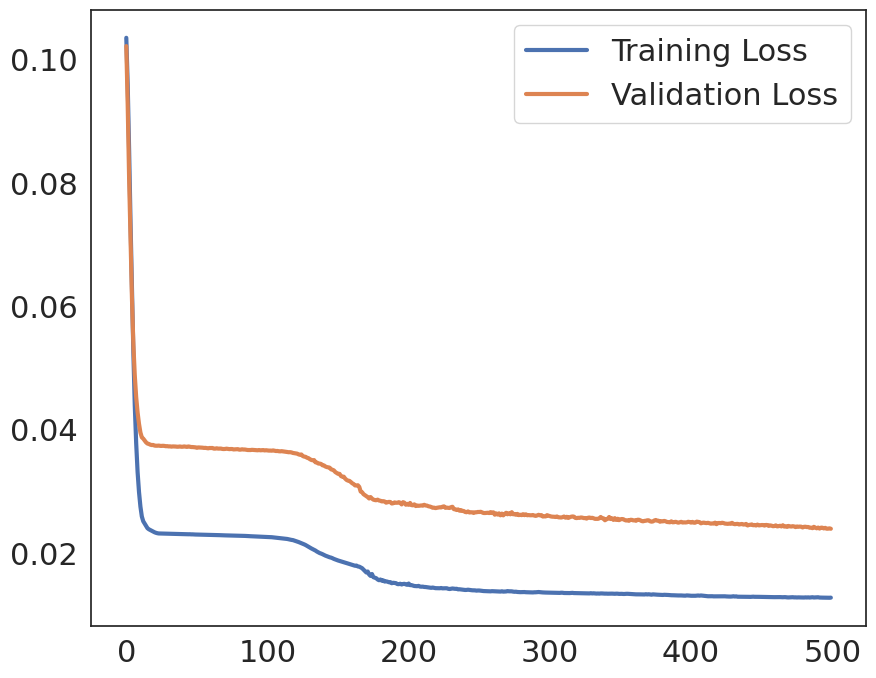

In [ ]:

plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

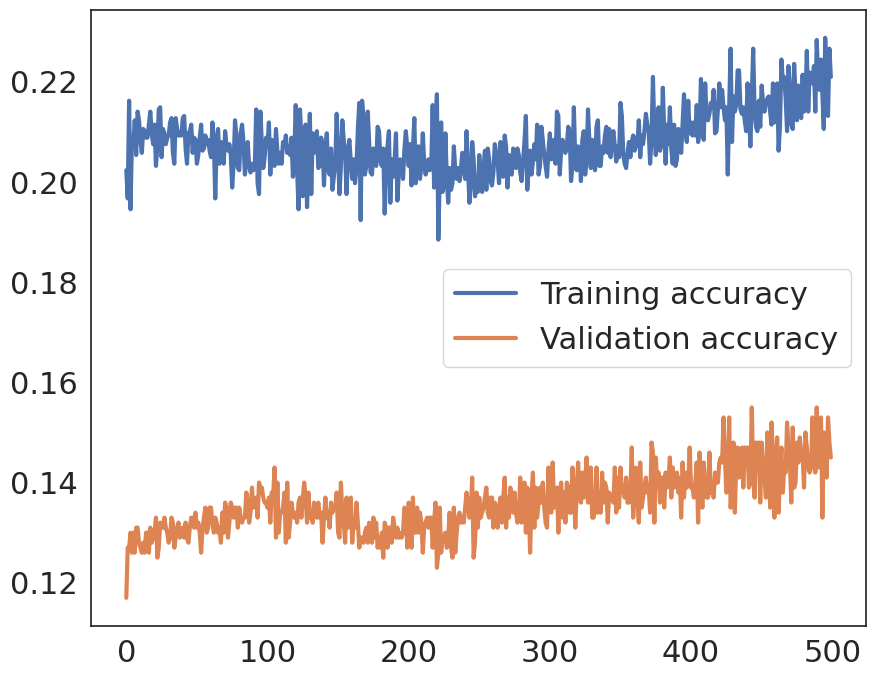

In [ ]:

plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["accuracy"], label="Training accuracy",linewidth=3.0)
plt.plot(history.history["val_accuracy"], label="Validation accuracy",linewidth=3.0)
plt.legend()

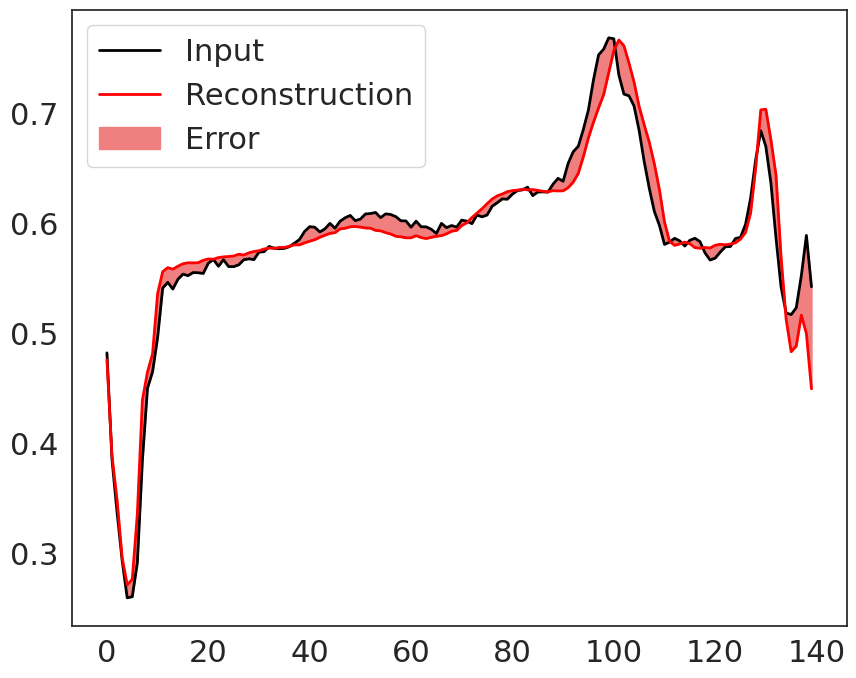

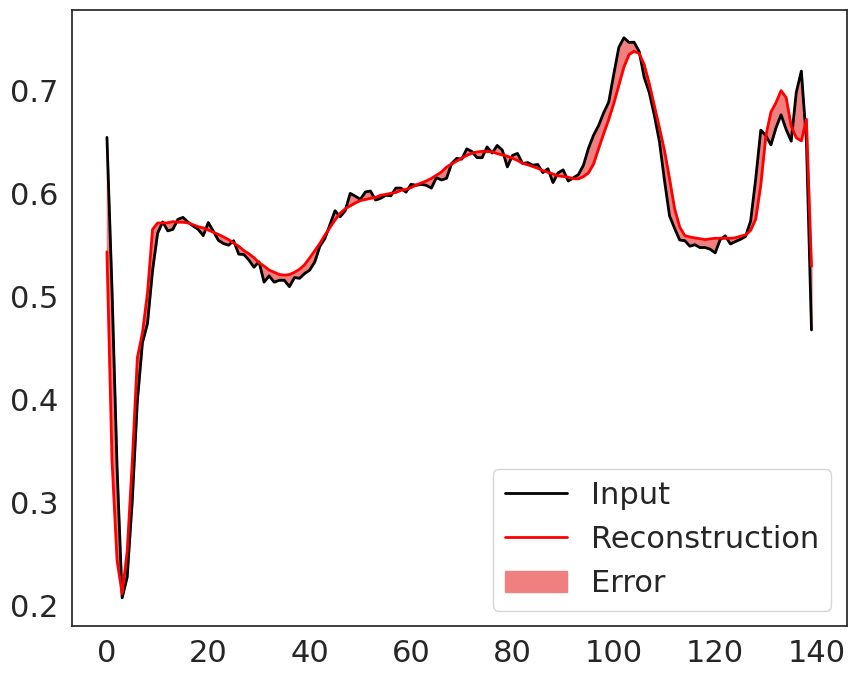

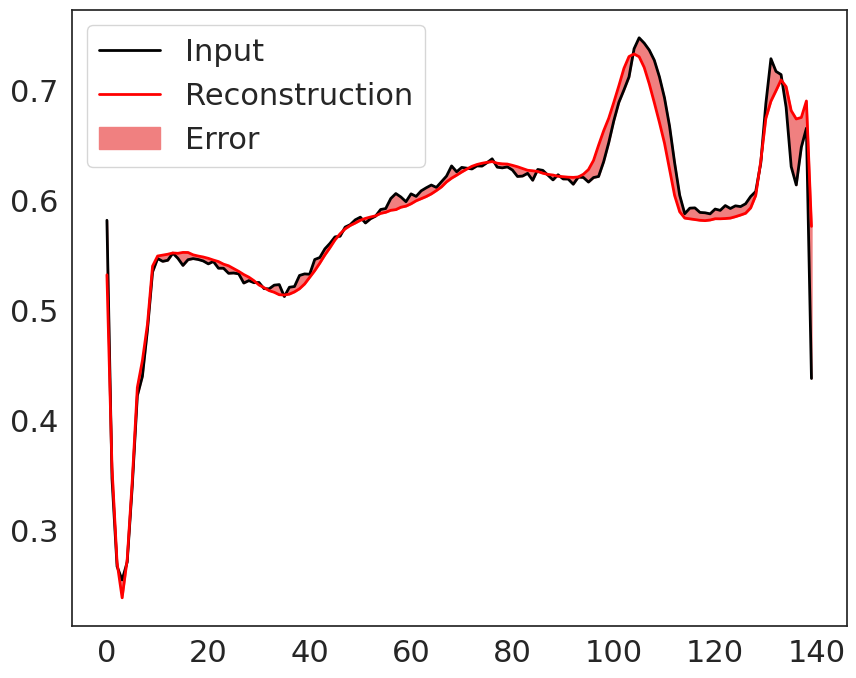

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

for i in range(0,3):
    plt.figure(figsize=(10,8))
    sns.set(font_scale = 2)
    sns.set_style("white")
    plt.plot(normal_test_data[i], 'black',linewidth=2)
    plt.plot(decoded_imgs[i], 'red',linewidth=2)
    plt.fill_between(np.arange(140), decoded_imgs[i], normal_test_data[i], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()

In [ ]:
encoded_imgs_normal = pd.DataFrame(encoded_imgs)
encoded_imgs_normal['label'] = 1

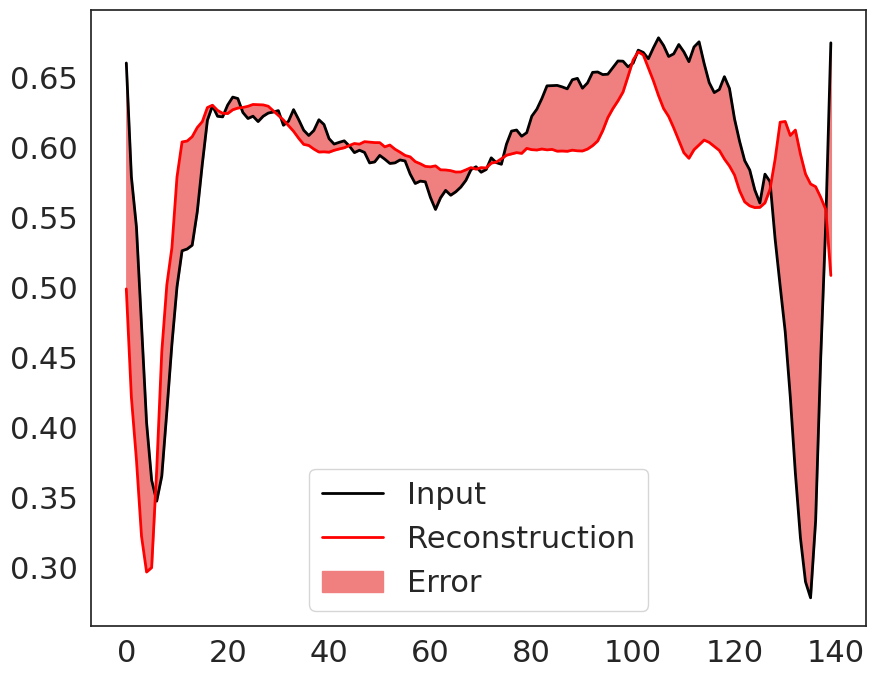

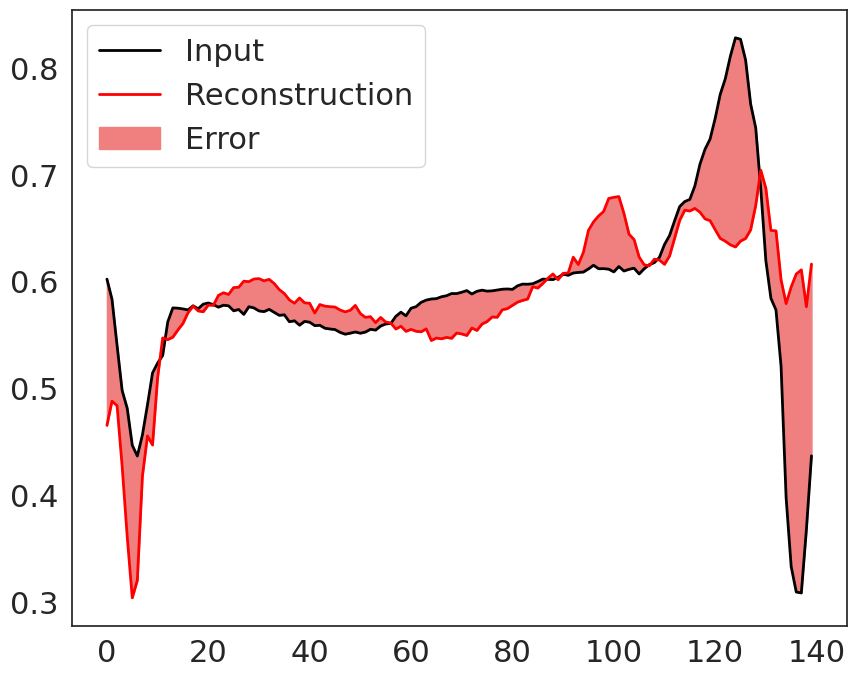

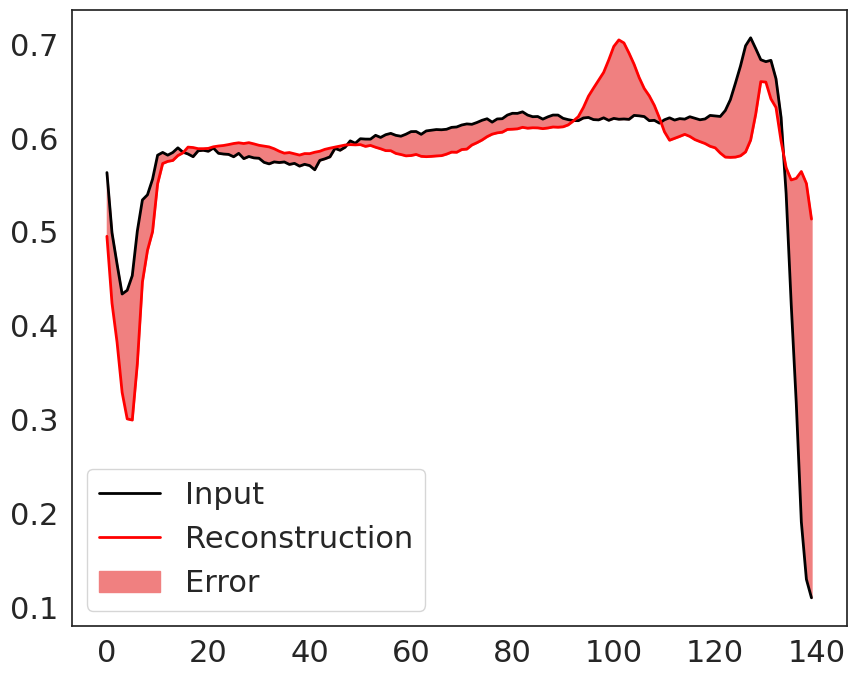

In [ ]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

for i in range(0,3):
    plt.figure(figsize=(10,8))
    sns.set(font_scale = 2)
    sns.set_style("white")
    plt.plot(anomalous_test_data[i], 'black',linewidth=2)
    plt.plot(decoded_imgs[i], 'red',linewidth=2)
    plt.fill_between(np.arange(140), decoded_imgs[i], anomalous_test_data[i], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()

In [ ]:
encoded_imgs_abnormal = pd.DataFrame(encoded_imgs)
encoded_imgs_abnormal['label'] = 0

In [ ]:
all_encoded = pd.concat([encoded_imgs_normal,encoded_imgs_abnormal])

In [ ]:
# mapper = umap.UMAP().fit(all_encoded.iloc[:,:8])
# umap.plot.points(mapper, labels=all_encoded.iloc[:,8], theme='fire')

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

73/73 [==============================] - 0s 1ms/step


In [ ]:
np.mean(train_loss)

0.012800434

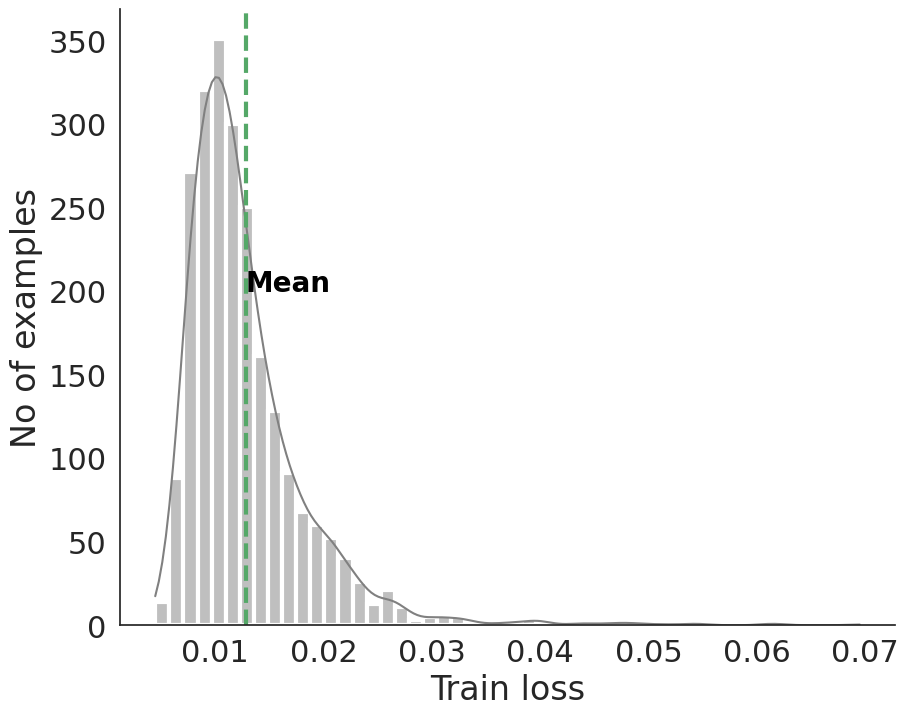

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Mean", horizontalalignment='left',
         size='small', color='black', weight='semibold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
sns.despine()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.018570809


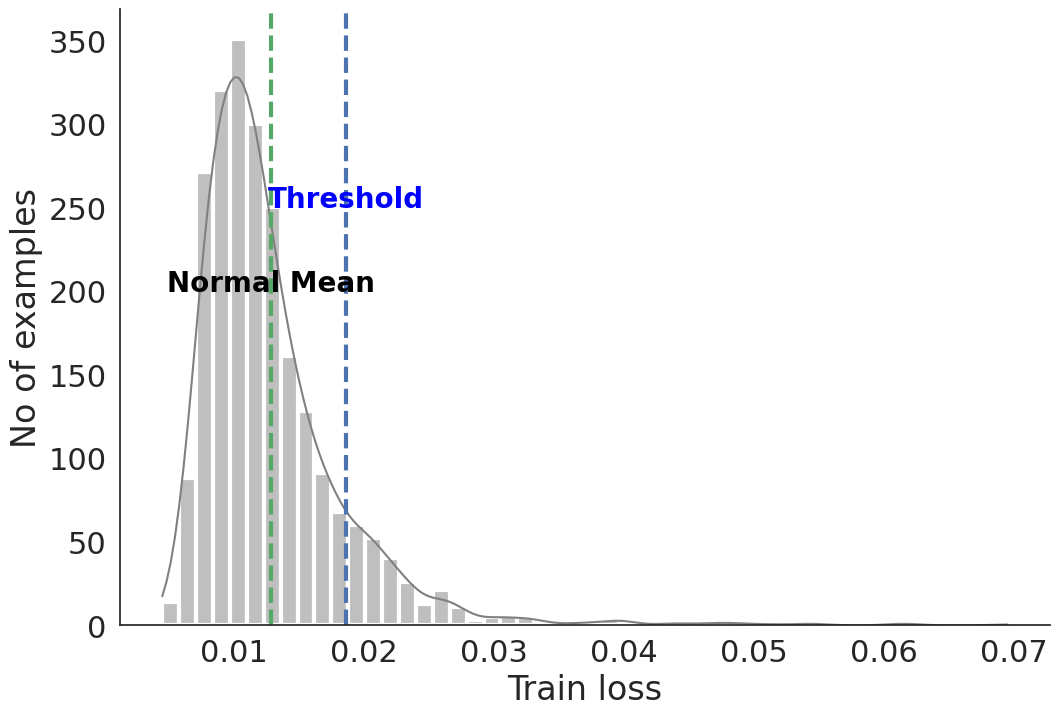

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center',
         size='small', color='Blue', weight='semibold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
sns.despine()

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

13/13 [==============================] - 0s 1ms/step


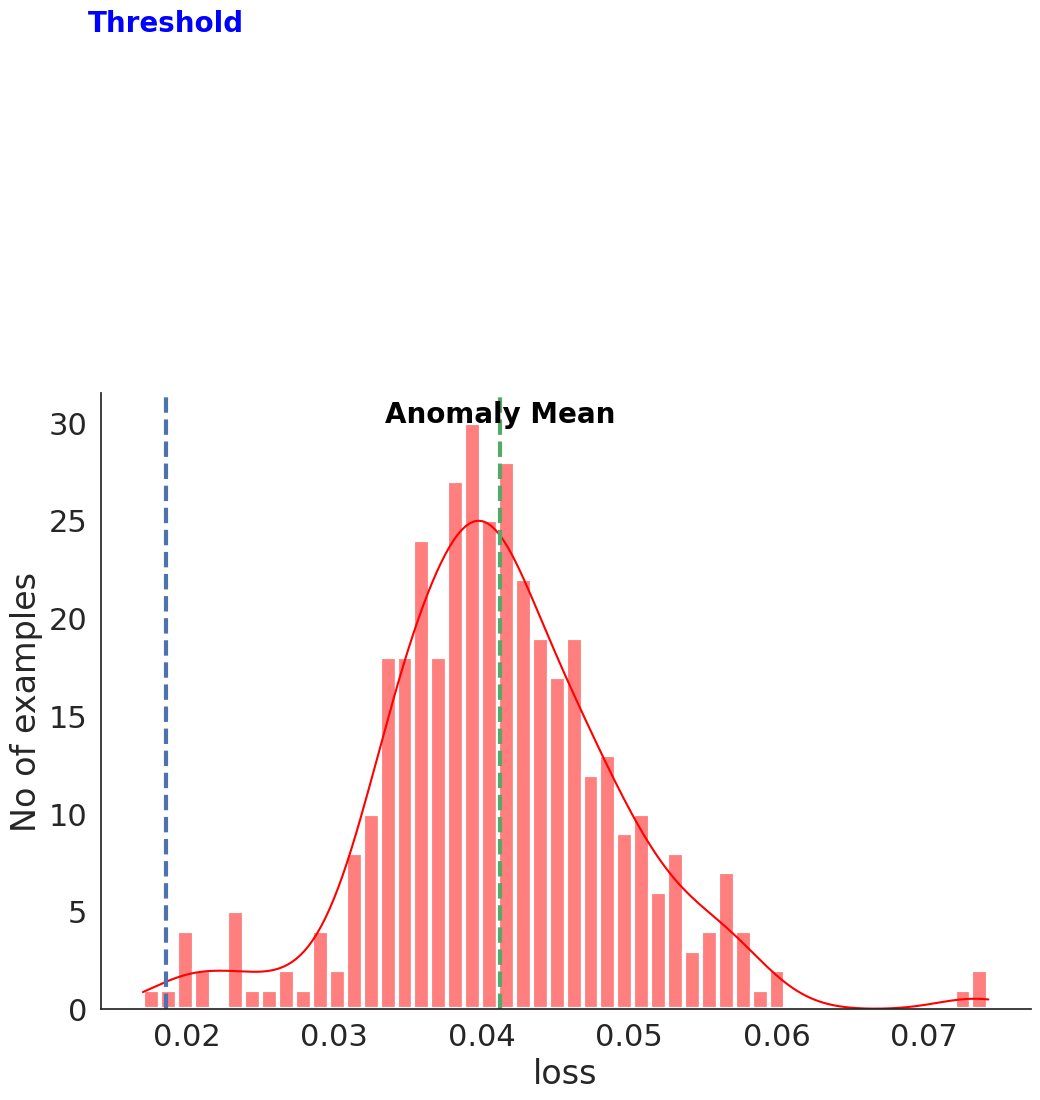

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(test_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 30, "Anomaly Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.text(threshold, 50, "Threshold", horizontalalignment='center',
         size='small', color='Blue', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

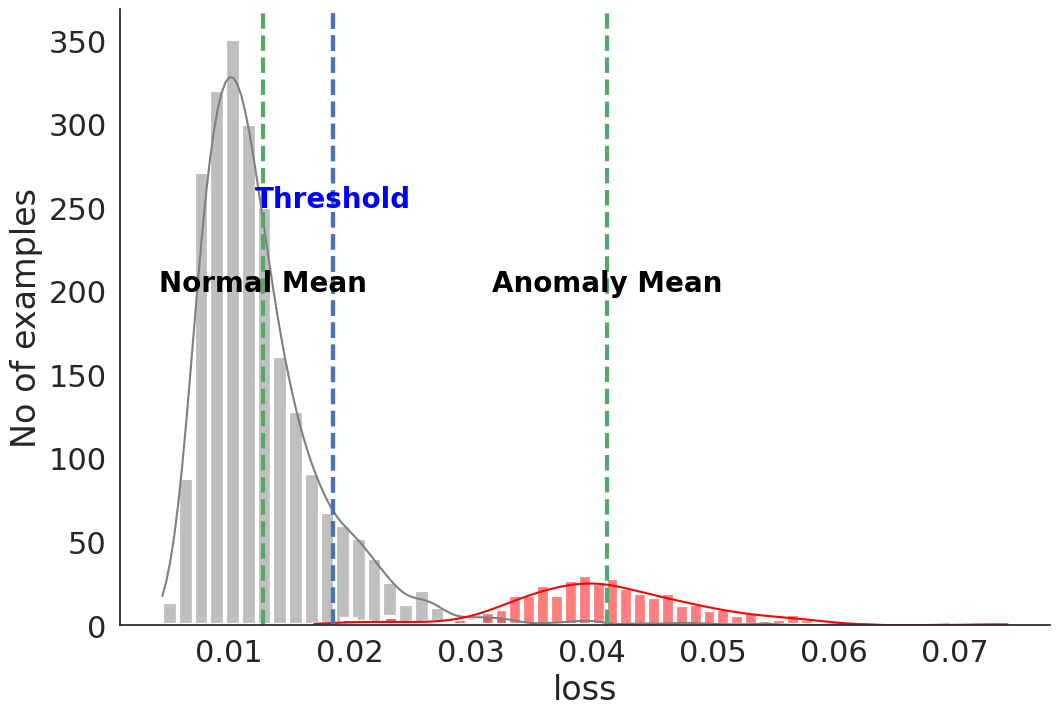

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)
plt.axvline(x=np.mean(train_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center',
         size='small', color='Blue', weight='semibold')

sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)
plt.axvline(x=np.mean(test_loss), color='g', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 200, "Anomaly Mean", horizontalalignment='center',
         size='small', color='black', weight='semibold')
plt.axvline(x=threshold, color='b', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.915
Precision = 0.9981060606060606
Recall = 0.8625204582651391


confusion matrix
[[388   1]
 [ 84 527]]
accuracy: 0.9150, precision: 0.9981, recall: 0.8625, \ F1: 0.9254, AUC: 0.9300


<Axes: >

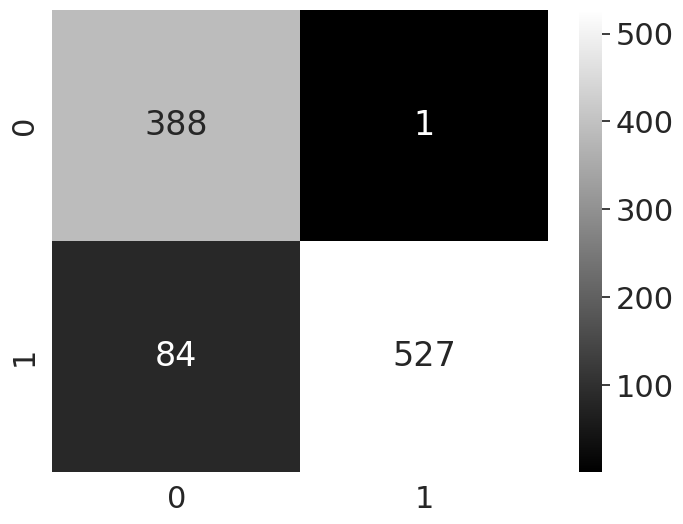

In [ ]:
confusion_matrix = get_clf_eval(test_labels,preds,preds)
plt.figure(figsize=(8,6))
sns.set(font_scale = 2)
sns.set_style("white")
sns.heatmap(confusion_matrix, cmap = 'gist_yarg_r',annot = True, fmt='d')

In [ ]:
# normal_df = normal_train_data[0]
# # normal_df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/normal_ecg.csv')
# # normal_df.dtype
# # normal_df = tf.numpy().tolist()

# # # Open a CSV file for writing
# # with open('normal_ecg.csv', 'w', newline='') as file:
# #     writer = csv.writer(file)

# #     # Write each row to the CSV file
# #     writer.writerows(data)

# normal_df_np = normal_df.numpy()
# normal_df_ecg = pd.DataFrame(normal_df_np)
# normal_df_ecg.to_csv(r'/content/drive/MyDrive/Colab Notebooks/normal_ecg.csv')


abnormal_df = anomalous_train_data[0]
abnormal_df_np = abnormal_df.numpy()
abnormal_df_ecg = pd.DataFrame(abnormal_df_np)
abnormal_df_ecg.to_csv(r'/content/drive/MyDrive/Colab Notebooks/abnormal_ecg.csv')

In [ ]:
# import gradio as gr
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

In [ ]:
import gradio as gr
from io import StringIO

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/normal_ecg.csv')
# df.drop("Unnamed: 0", inplace=True, axis=1)
# df = df.to_numpy()
# df = df.reshape(1,-1)
df.shape

In [ ]:
def normal_plot(df):
  plt.figure(figsize=(10,8))
  sns.set(font_scale=2)
  sns.set_style('white')
  plt.grid()
  plt.plot(np.arange(140), normal_df_ecg,color='black', linewidth=3.0)
  # plt.plot(normal_train_data[60],color='black', linewidth=3.0)
  plt.title('normal ecg')

def predict_model(df):
  pred = predict(loaded_model, df, threshold)
  return pred

In [ ]:
predict_model(df)

In [ ]:
normal_plot(df)

In [ ]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import plotly.graph_objects as go
import plotly.express as px

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/')

def plot_ecg_from_df(df):
    df = pd.read_csv(df)

    ecg_data = df.iloc[:, 0]
    y = df.iloc[:,1]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ecg_data,y)
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Amplitude (mV)")
    ax.set_title("ECG Plot")
    grid = ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    return fig

def plot_reconstruction_error(df):
  df= pd.read_csv(df)

  df.drop("Unnamed: 0", inplace=True, axis=1)

  df = df.to_numpy()
  df = df.reshape(1,-1)
  encoded_imgs = loaded_model.encoder(df).numpy()
  decoded_imgs = loaded_model.decoder(encoded_imgs).numpy()

  fig = go.Figure()

  fig.add_trace(go.Scatter(x=np.arange(140), y=df[0], mode='lines', name='Input', line=dict(color='black', width=2)))

  fig.add_trace(go.Scatter(x=np.arange(140), y=decoded_imgs[0], mode='lines', name='Reconstruction', line=dict(color='red', width=2)))

  fig.add_trace(go.Scatter(x=np.arange(140), y=df[0], fill='tonexty', fillcolor='lightcoral', line=dict(color='rgba(0,0,0,0)'), showlegend=False))

  fig.update_layout(title='Reconstruction Error Plot',
                    xaxis_title='Time',
                    yaxis_title='Value',
                    legend=dict(x=0, y=1, traceorder='normal'),
                    showlegend=True)

  return fig


def predict(df):
  df = pd.read_csv(df)
  df.drop("Unnamed: 0", inplace = True, axis = 1)
  df = df.to_numpy()
  df = df.reshape(1,-1)

  pred = predict(loaded_model, df, threshold)

  return pred

with gr.Blocks() as demo:
  gr.Markdown("something")

  with gr.Row():
    with gr.Column():
      csv_input = gr.UploadButton(label="Upload CSV", file_types=[".csv"],file_count='single')
      image = gr.Plot(label="Plot")

      csv_input.upload(fn=plot_ecg_from_df, inputs=csv_input, outputs=image, api_name="upload_csv")

      # text = gr.TextBox(fn = predict(df), inputs=csv_input, outputs = text)
    with gr.Column():
      error_plot = gr.Button("Plot error", visible=True)
      image1 = gr.Plot()
      error_plot.click(fn=plot_reconstruction_error, inputs=csv_input, outputs=[image1])
#   gr.Examples(
#       examples = '/content/drive/MyDrive/Colab Notebooks/normal_ecg.csv',
#       inputs = csv_input,
#       outputs = [image, image1]
#   )
# # demo.interface[0][0].examples = [
examples = [
    {"normal_ecg": '/content/drive/MyDrive/Colab Notebooks/normal_ecg.csv'}
    # Add more examples if needed
]

demo.launch( debug=True)



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://739827c548b2616c39.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# autoenc = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/')

# def model_predict(df):
#   encoded_img = autoenc.encoder(normal_df_ecg).numpy()
#   decoded_img = autoenc.decoder(normal_df_ecg).numpy()
#   for i in range(0,3):
#     plt.figure(figsize=(10,8))
#     sns.set(font_scale = 2)
#     sns.set_style("white")
#     plt.plot(normal_df_ecg, 'black',linewidth=2)
#     plt.plot(decoded_img, 'red',linewidth=2)
#     plt.fill_between(np.arange(140), decoded_img, normal_df_ecg, color='lightcoral')
#     plt.legend(labels=["Input", "Reconstruction", "Error"])
#     plt.show()

def plot_reconstruction_error(df):
  encoded_imgs = loaded_model.encoder(df).numpy()
  decoded_imgs = loaded_model.decoder(encoded_imgs).numpy()


  plt.figure(figsize=(10,8))
  sns.set(font_scale = 2)
  sns.set_style("white")
  plt.plot(df[0], 'black',linewidth=2)
  plt.plot(decoded_imgs[0], 'red',linewidth=2)
  plt.fill_between(np.arange(140), decoded_imgs[0], df[0], color='lightcoral')
  plt.legend(labels=["Input", "Reconstruction", "Error"])
  plt.show()

In [ ]:
normal_df_ecg_np =tf.cast(normal_df_ecg_np)

In [ ]:
model_predict(normal_df_ecg)

In [ ]:
pred = predict(autoencoder, normal_df_ecg, threshold)

In [ ]:
pred

In [ ]:
# normal_df_ecg = normal_df_ecg.values.reshape(-1,1)
normal_df_ecg=normal_df_ecg.reshape(1,-1)
normal_df_ecg.shape

In [ ]:
test_data_np= test_data.numpy()
test_data_np = pd.DataFrame(test_data_np)
test_data_np

In [ ]:
test_data.shape

In [ ]:
normal_df_ecg_np = np.array(normal_df_ecg)
# model_predict(np.array(normal_df_ecg))
# dataset = normal_df_ecg_np[:,0]

In [ ]:
model_predict(normal_df)


In [ ]:
def normal_plot(df):
  plt.figure(figsize=(10,8))
  sns.set(font_scale=2)
  sns.set_style('white')
  plt.grid()
  plt.plot(np.arange(140), normal_df_ecg,color='black', linewidth=3.0)
  # plt.plot(normal_train_data[60],color='black', linewidth=3.0)
  plt.title('normal ecg')
  return plt

In [ ]:
def plot_ecg_from_df(df,):
    """Plots an ECG from a pandas DataFrame and returns the plot.

    Args:
        df: A pandas DataFrame containing the EKG data (single column).

    Returns:
        A Matplotlib figure containing the EKG plot.
    """

    # Extract the EKG data column (assuming it's the first column)
    ecg_data = df.iloc[:, 0]
    # y = [i for i in range(141)]

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ecg_data)
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Amplitude (mV)")
    ax.set_title("ECG Plot")
    grid = ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    return fig


In [ ]:
plot1 = plot_ecg_from_df(normal_df_ecg)
plot1

In [ ]:
normal_df_ecg

In [ ]:
from matplotlib import pyplot as plt
normal_df_ecg[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)